In [ ]:
%pip install folium

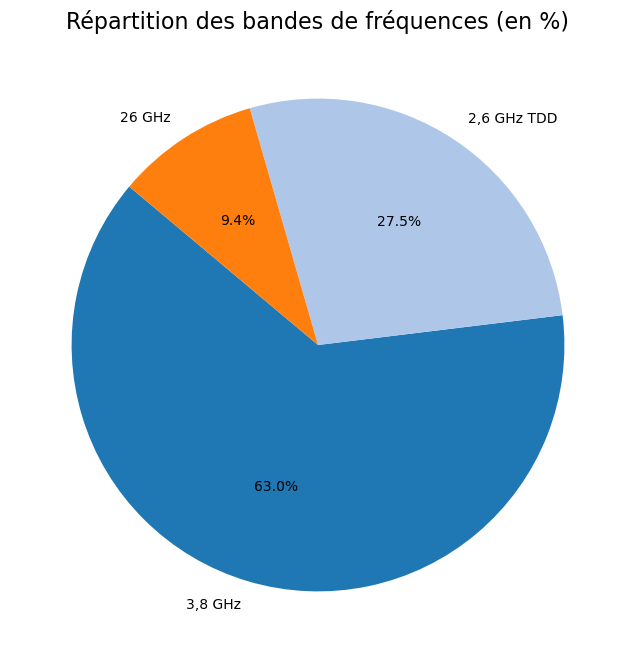

In [114]:
import folium
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("experimentations_5G.csv", sep=";", encoding="cp1252", usecols=["Expérimentateur","Bande de fréquences","Latitude", "Longitude","Commune", "Code INSEE", "Région"])

data = data.fillna(0)


# partie carte de la france et des antennes 5g 

data["Latitude"] = data["Latitude"].astype(str).str.replace(",", ".").astype(float)
data["Longitude"] = data["Longitude"].astype(str).str.replace(",", ".").astype(float)

france = folium.Map(location=[45.6, 3.351828], zoom_start=6)

for _, row in data.iterrows():
    if row["Bande de fréquences"] == "26 GHz":
        colorping = "green"
    elif row["Bande de fréquences"] == "3,8 GHz":
        colorping = "orange"
    elif row["Bande de fréquences"] == "2,6 GHz TDD":
        colorping = "red"
    
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        tooltip=["Cliquez-ici ! Commune : ",row["Commune"]," Code INSEE : ",row["Code INSEE"] ],
        popup=["Les Expérimentateur : ",row["Expérimentateur"]," Et les bandes de fréquences : ",row["Bande de fréquences"] ],
        icon=folium.Icon(color=colorping),
    ).add_to(france)

# partie graphique

frequency_counts = data["Bande de fréquences"].value_counts()

frequency_percentages = (frequency_counts / frequency_counts.sum()) * 100
plt.figure(figsize=(8, 8))
plt.pie(
    frequency_percentages, 
    labels=frequency_percentages.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab20.colors 
)
plt.title("Répartition des bandes de fréquences (en %)", fontsize=16)

plt.show()
france

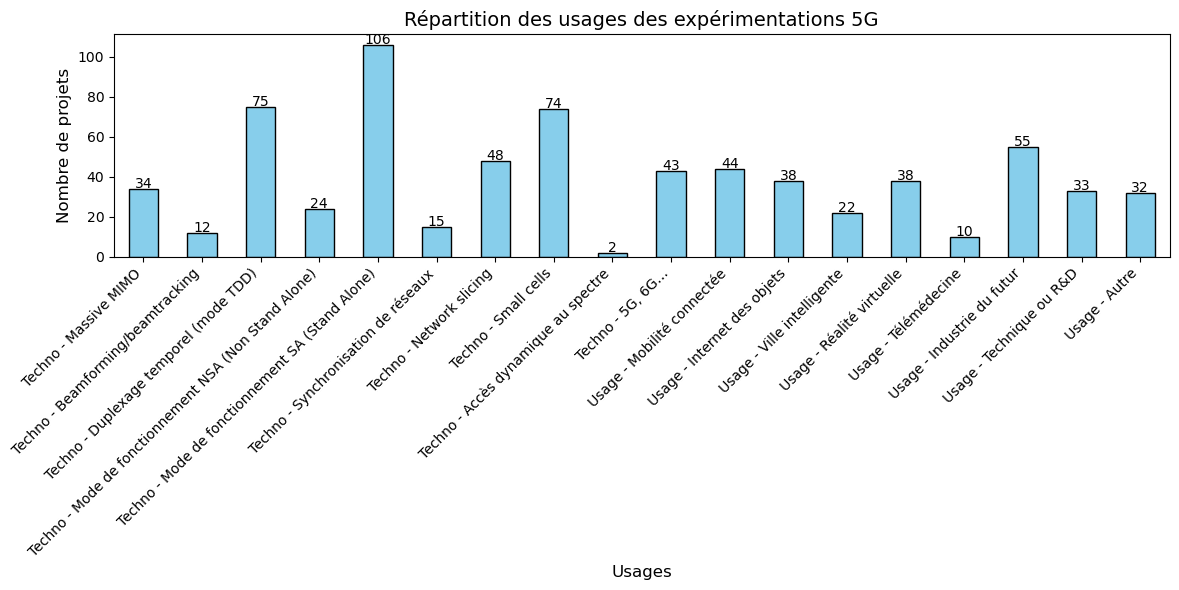

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'experimentations_5G.csv'  
usage_columns = [
    "Techno - Massive MIMO", "Techno - Beamforming/beamtracking", 
    "Techno - Duplexage temporel (mode TDD)", "Techno - Mode de fonctionnement NSA (Non Stand Alone)",
    "Techno - Mode de fonctionnement SA (Stand Alone)", "Techno - Synchronisation de réseaux",
    "Techno - Network slicing", "Techno - Small cells", 
    "Techno - Accès dynamique au spectre", "Techno - 5G, 6G…", 
    "Usage - Mobilité connectée", "Usage - Internet des objets", 
    "Usage - Ville intelligente", "Usage - Réalité virtuelle", 
    "Usage - Télémédecine", "Usage - Industrie du futur", 
    "Usage - Technique ou R&D", "Usage - Autre"
]

data = pd.read_csv(file_path, sep=";", encoding="cp1252", usecols=usage_columns)

usage_totals = data.sum()

plt.figure(figsize=(12, 6))
bars = usage_totals.plot(kind='bar', color='skyblue', edgecolor='black')

for index, value in enumerate(usage_totals):
    plt.text(index, value + 0.5, str(int(value)), ha='center', fontsize=10, color='black')

plt.title('Répartition des usages des expérimentations 5G', fontsize=14)
plt.ylabel('Nombre de projets', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Usages', fontsize=12)

plt.tight_layout()
plt.show()
